In [6]:
import copy
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import qiskit.quantum_info as qi
from IPython.display import clear_output
from qiskit import (IBMQ, ClassicalRegister, QuantumCircuit, QuantumRegister,
                    execute, pulse, transpile)
from qiskit.circuit import Parameter
from qiskit.circuit.random import random_circuit
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,
                                                 tensored_meas_cal)
from qiskit.ignis.verification.tomography import (GatesetTomographyFitter,
                                                  ProcessTomographyFitter,
                                                  StateTomographyFitter,
                                                  gateset_tomography_circuits,
                                                  process_tomography_circuits,
                                                  state_tomography_circuits)
from qiskit.quantum_info import Operator
#from qiskit.providers.aer import QasmSimulator, Aer
from qiskit.utils.mitigation.fitters import (CompleteMeasFitter,
                                             TensoredFilter,
                                             TensoredMeasFitter)
from qiskit.visualization import plot_histogram
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1, T2Ramsey

from lib import itselfmiti1

#from qiskit.backends.jobstatus import JOB_FINAL_STATES

ImportError: cannot import name 'SymbolicPulse' from 'qiskit.pulse.library' (C:\Users\asus\AppData\Roaming\Python\Python38\site-packages\qiskit\pulse\library\__init__.py)

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q',
                            group='open', 
                            project='main')
backend_sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_manila'))
backend_real_jakarta = provider.get_backend('ibmq_manila')
backend_sim_ideal = Aer.get_backend('aer_simulator')
backend = backend_sim_noisy_jakarta

ibmqfactory.load_account:WARNING:2022-11-05 17:19:00,673: Credentials are already in use. The existing account in the session will be replaced.


C:\Users\asus\AppData\Roaming\Python\Python38\site-packages\asteval\asteval.py:771: RuntimeWarning: overflow encountered in exp
  out = func(*args, **keywords)


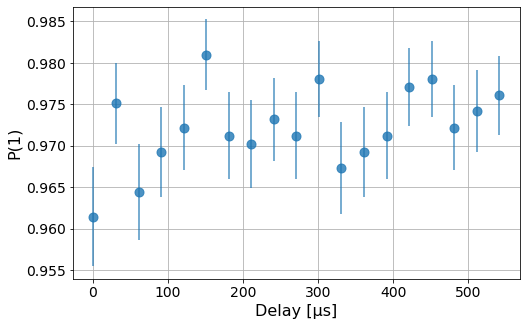

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: None
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: False
 - number of function evals: None
 - degree of freedom: None
 - chi-square: None
 - reduced chi-square: None
 - Akaike info crit.: None
 - Bayesian info crit.: None
- quality: bad
- device_components: ['Q0']
- verified: False


In [ ]:
# Look up target T1 of qubit-0 from device properties
qubit0_t1 = backend.properties().t1(0)

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(qubit=0, delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)

C:\Users\asus\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2197: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


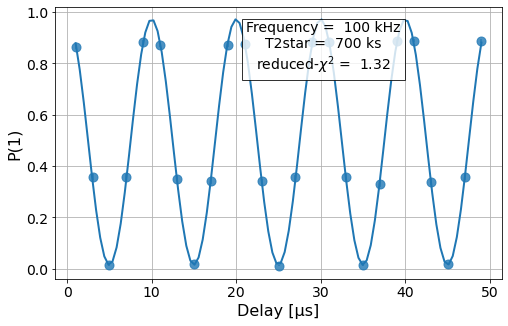

AnalysisResult
- name: @Parameters_T2RamseyAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_cos_decay(x) = amp * exp(-x / tau) * cos(2 * pi * freq * x + phi) + base
 - success: True
 - number of function evals: 9
 - degree of freedom: 20
 - chi-square: 26.404186131599314
 - reduced chi-square: 1.3202093065799656
 - Akaike info crit.: 11.36616845761896
 - Bayesian info crit.: 17.460547581959965
 - init params:
  * amp = 0.5
  * tau = 0.0
  * freq = 100000.0000000005
  * phi = 0.0
  * base = 0.4504747626186907
 - fit params:
  * amp = 0.4785126118495093
  * tau = 699955.7848010794
  * freq = 99976.7916417613
  * phi = 0.007546757832833768
  * base = 0.4936209926673388
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: Frequency
- value: 99976.7916417613+/-nan
- χ²: 1.3202093065799656
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T2star
- value: 69

C:\Users\asus\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2197: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


In [ ]:
qubit = 0
# set the desired delays
delays = list(np.arange(1e-6, 50e-6, 2e-6))
# Create a T2Ramsey experiment. Print the first circuit as an example
exp1 = T2Ramsey(qubit, delays, osc_freq=1e5)




# Set scheduling method so circuit is scheduled for delay noise simulation
exp1.set_transpile_options(scheduling_method='asap')

# Run experiment
expdata1 = exp1.run(backend=backend, shots=2000, seed_simulator=101)
expdata1.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
display(expdata1.figure(0))
for result in expdata1.analysis_results():
    print(result)

In [ ]:
backend_config = backend.configuration()
print(backend_config.open_pulse)
#assert backend_config.open_pulse, "Backend doesn't support Pulse"

False
